## Heart Disease Prediction 
### 1. Initial Setup and Data Loading
First, import all necessary libraries and load our dataset. Using a carefully selected set of libraries that each serve a specific purpose in our analysis:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import joblib

# Set up plotting style directly with seaborn
sns.set_theme()  # This sets the seaborn styling
sns.set_style("whitegrid")  # This adds a grid to our plots

Now, let's load and examine our data:

In [ ]:
# Load the dataset
df = pd.read_csv('dataset/heart_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFeature Information:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (1000, 14)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   float64
 1   sex       1000 non-null   int64  
 2   cp        1000 non-null   int64  
 3   trestbps  1000 non-null   float64
 4   chol      1000 non-null   float64
 5   fbs       1000 non-null   int64  
 6   restecg   1000 non-null   int64  
 7   thalach   1000 non-null   float64
 8   exang     1000 non-null   int64  
 9   oldpeak   1000 non-null   float64
 10  slope     1000 non-null   int64  
 11  ca        1000 non-null   int64  
 12  thal      1000 non-null   int64  
 13  target    1000 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 109.5 KB
None

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1,0,125.0,220.0,0,1,165.0,0,3.6,1,1,2,0
1,53.0,1,0,135.0,314.0,1,2,165.0,0,1.0,1,0,2,0
2,60.0,1,0,153.0,303.0,0,2,159.0,1,4.0,2,3,2,1
3,68.0,0,2,131.0,280.0,0,0,140.0,0,0.4,0,2,2,1
4,52.0,1,1,103.0,203.0,0,0,184.0,1,1.2,2,0,2,1


## 2. Exploratory Data Analysis (EDA)

Let's perform a comprehensive analysis of our dataset to understand its characteristics:


Statistical Summary:
               age          sex           cp    trestbps         chol  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean     54.164000     0.699000     0.864000   132.23300   261.248000   
std       8.750639     0.458922     0.942546    15.88052    55.048441   
min      29.000000     0.000000     0.000000    94.00000   126.000000   
25%      48.000000     0.000000     0.000000   122.00000   221.750000   
50%      54.000000     1.000000     1.000000   132.00000   263.000000   
75%      60.000000     1.000000     1.000000   143.00000   301.000000   
max      77.000000     1.000000     3.000000   194.00000   450.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.478000     0.669000   165.439000     0.362000     1.008200   
std       0.499766     0.774622    13.330566     0.480819     0.972347   
min       0.000000     0.

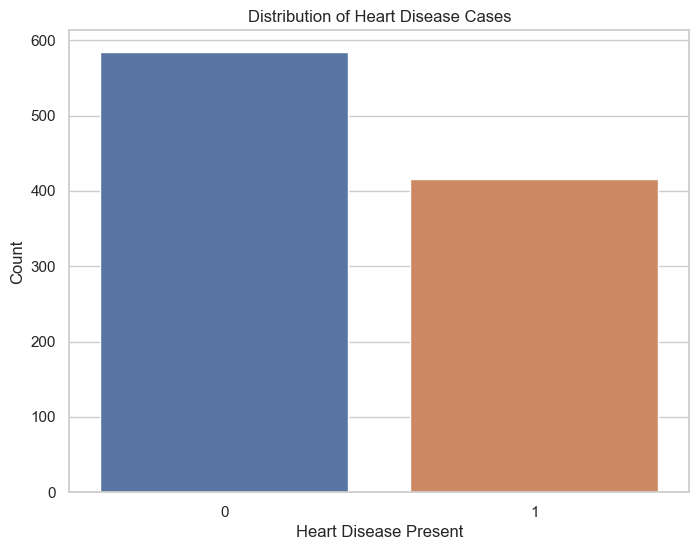

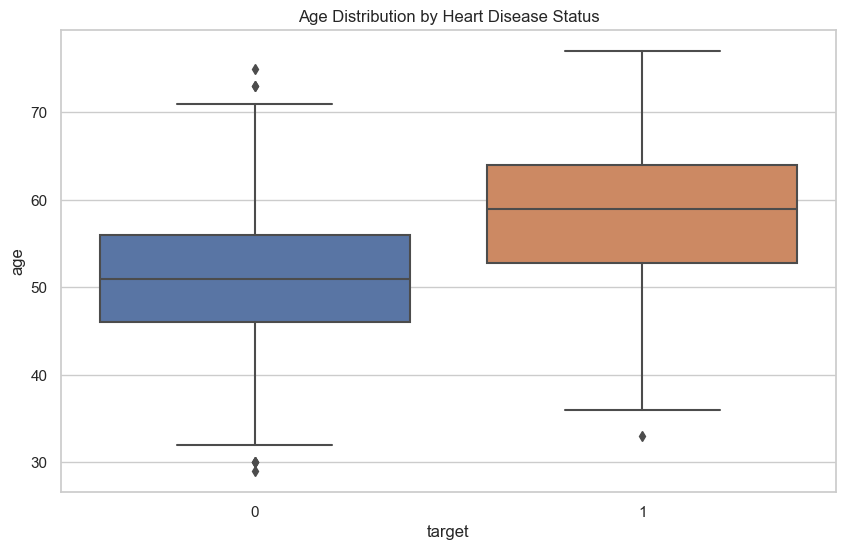

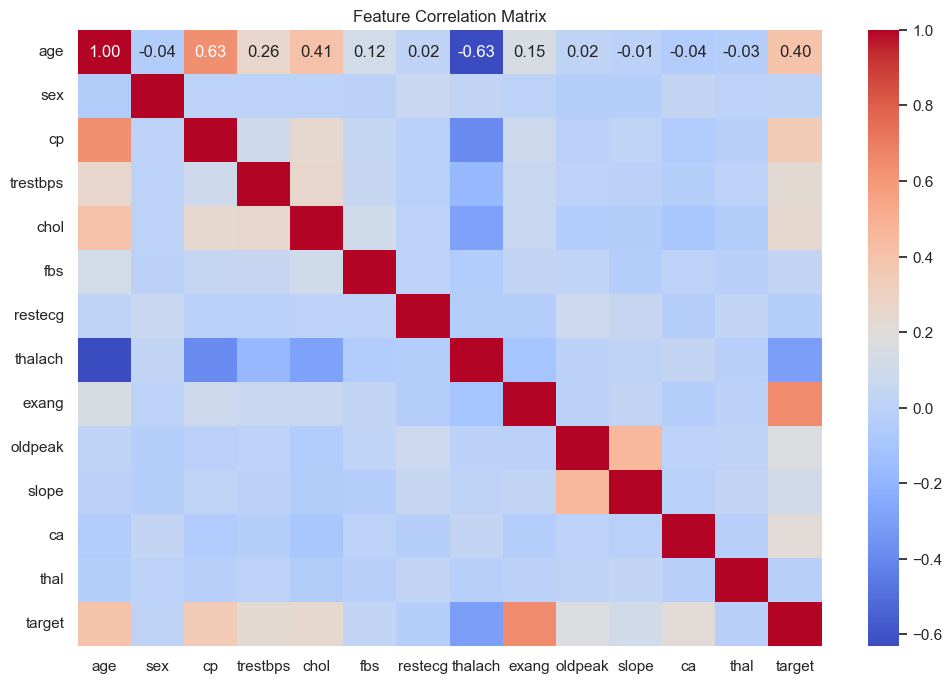

In [12]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
plt.show()

# Age distribution by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution by Heart Disease Status')
plt.show()

# Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

## 3. Data Preprocessing

prepare our data for modeling:

In [13]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Model Development

Implement our Random Forest model with hyperparameter tuning:

In [14]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize base model
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## 5. Model Evaluation

Evaluate our model's performance:

Model Performance Metrics:

Accuracy Score: 0.965

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       111
           1       0.96      0.97      0.96        89

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



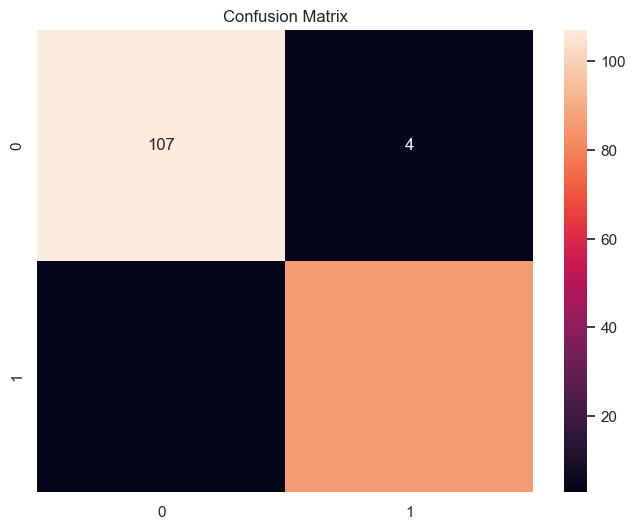

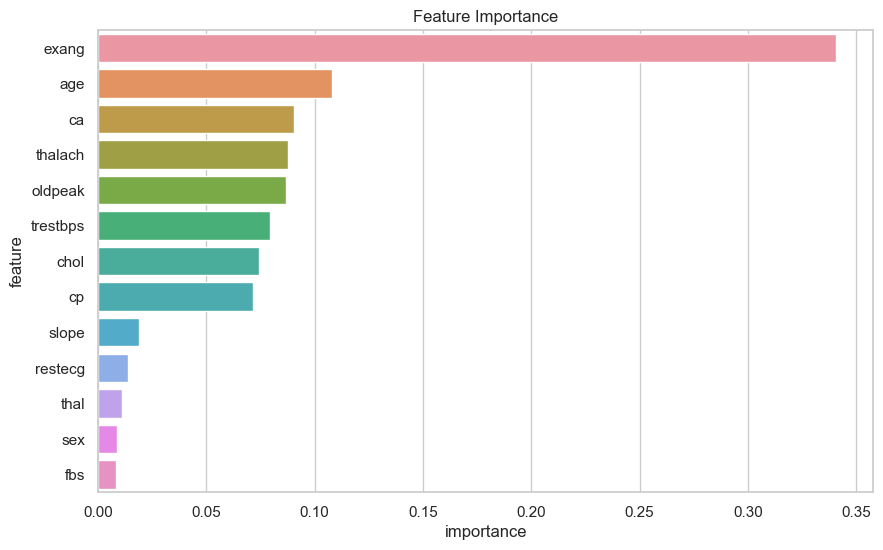

In [15]:
# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Print metrics
print("Model Performance Metrics:")
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

## 6. Model Interpretability with SHAP

Use SHAP values to understand our model's decisions:

<Figure size 1400x1600 with 0 Axes>

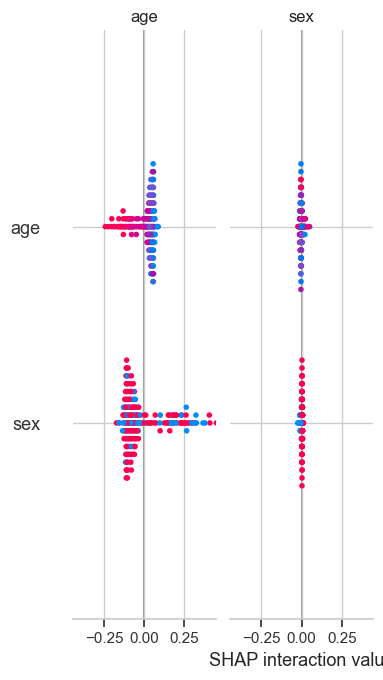

In [20]:
# Calculate SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
plt.figure(figsize=(14, 16))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)
plt.show()

## 7. Model Persistence

Finally save our model for future use:

In [22]:
# Save model and scaler
joblib.dump(best_model, 'models/heart_disease_predictor_model.joblib')
joblib.dump(scaler, 'models/heart_disease_predictor_scaler.joblib')

# Example of loading and using the model
loaded_model = joblib.load('models/heart_disease_predictor_model.joblib')
loaded_scaler = joblib.load('models/heart_disease_predictor_scaler.joblib')

# Example prediction
sample_patient = X.iloc[[0]]  # First patient's features
scaled_sample = loaded_scaler.transform(sample_patient)
prediction = loaded_model.predict_proba(scaled_sample)
print(f"Probability of heart disease: {prediction[0][1]:.2f}")

Probability of heart disease: 0.03
